<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_9%EC%9E%A5_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_p_328~347.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.2 가우시안 혼합

### 가우시안 혼합 모델 (GMM)

- 여러 개의 가우시안 분포가 섞여 있는 확률 모델로, 샘플이 어떤 가우시안 분포에서 생성되었는지는 알 수 없지만, 여러 개의 클러스터로 구성된다고 가정

### GMM의 주요 개념
- **클러스터**: 각 가우시안 분포는 하나의 클러스터를 형성하며, 타원형의 모양을 가질 수 있음.
- **확률적 샘플링 과정**:
  1. 각 샘플은 여러 클러스터 중 하나에서 무작위로 선택됨.
  2. 특정 클러스터가 선택될 확률은 클러스터의 가중치 $ \phi $ 로 결정됨.
  3. 선택된 클러스터에서 샘플이 해당 가우시안 분포(평균 $ \mu $, 공분산 $ \Sigma $)를 따르는 방식으로 생성됨.
- **표기법**:
  - 샘플 $ x_i $ 가 클러스터 $ j $ 에서 생성됨:  
    $$ x_i \sim \mathcal{N}(\mu_j, \Sigma_j) $$

### GMM의 특성
- 클러스터 개수 $ k $ 를 사전에 설정해야 함.
- 그래픽 모델을 통해 확률 변수 간의 조건부 의존성을 나타낼 수 있음.

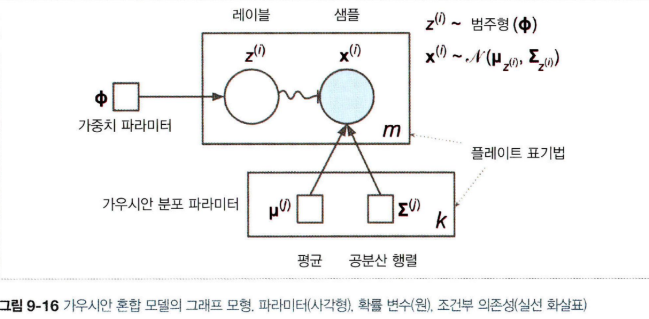

- **원(circle)**: 확률 변수를 나타냄.
- **사각형(rectangle)**: 고정된 값을 의미하며, 모델의 파라미터를 나타냄.
- **큰 사각형(plate)**: 내부의 내용이 여러 번 반복됨을 의미하며, 플레이트 오른쪽 아래 숫자는 반복 횟수를 나타냄.
- **확률 변수**:
  - $z_i$: 클러스터 할당을 나타내는 확률 변수로, 가중치를 갖는 범주형 분포에서 샘플링됨.
  - $x_i$: $z_i$로 정의된 평균과 공분산 행렬을 사용하여 정규분포에서 샘플링됨.
  - $\mu_j$, $\Sigma_j$: 각각 클러스터의 평균과 공분산 행렬.
  - $\phi$: 각 클러스터의 가중치를 담고 있는 벡터.

- **화살표(Edges)**:
  - **실선 화살표**: 조건부 의존성을 의미함.
    - 예: $z_i$의 확률 분포는 가중치 벡터 $\phi$에 의존함.
    - 플레이트를 가로지르는 경우, 해당 변수는 모든 반복에서 영향을 미침.
  - **구불구불한 화살표(Switch)**: 특정 값에 따라 선택되는 경로를 나타냄.
    - 예: $z_i = j$이면, $x_i \sim \mathcal{N}(\mu_j, \Sigma_j)$.

- **변수 유형**:
  - **관측 변수(observed variable)**: 색이 채워진 원으로 표시되며, 실제로 알려진 값(예: $x_i$).
  - **잠재 변수(latent variable)**: 알려지지 않은 확률 변수로, 색이 채워지지 않은 원으로 표현됨(예: $z_i$).


GMM을 사용하면 데이터셋 $X$ 가 주어졌을 때, 다음을 추정할 수 있다.

1. **클러스터 가중치**: $\phi$
2. **각 가우시안 분포의 평균**: $\mu_1, \mu_2, ..., \mu_p$
3. **각 가우시안 분포의 공분산 행렬**: $\Sigma_1, \Sigma_2, ..., \Sigma_p$

사이킷런의 `GaussianMixture` 클래스를 사용하면 이를 쉽게 구현할 수 있음.

In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise= 0.05)

In [2]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [3]:
gm.weights_ # 가중치

array([0.58156644, 0.21065636, 0.2077772 ])

In [4]:
gm.means_ # 평균 행렬

array([[ 0.49431105,  0.25529153],
       [ 1.72233597, -0.07136582],
       [-0.73627728,  0.56570423]])

In [5]:
gm.covariances_ # 분산 행렬

array([[[ 0.16089998, -0.09304782],
        [-0.09304782,  0.28583319]],

       [[ 0.05872321,  0.06542395],
        [ 0.06542395,  0.09072147]],

       [[ 0.05738085,  0.06565035],
        [ 0.06565035,  0.09100713]]])

- 알고리즘이 찾은 것과 가중치 & 평균 & 분산 행렬이 매우 비슷 -> 기댓값-최대화 알고리즘 사용했기 때문

### GMM이 파라미터를 찾는 방법: EM 알고리즘

- GMM은 **기댓값-최대화(Expectation-Maximization, EM) 알고리즘**을 사용하여 클러스터의 가중치, 평균, 공분산 행렬을 추정.  
- 이 과정은 **k-평균 알고리즘**과 유사하지만 더 일반적인 형태로, 하드 클러스터링이 아닌 **소프트 클러스터링**을 수행.

### EM 알고리즘의 동작 과정
1. **초기화**: 클러스터 파라미터(가중치, 평균, 공분산 행렬)를 랜덤하게 설정.
2. **반복 과정** (수렴할 때까지 진행)
   - **기댓값 단계**: 현재 클러스터 파라미터를 기반으로 각 샘플이 특정 클러스터에 속할 확률(책임도, responsibility)을 계산.
   - **최대화 단계**: 샘플의 책임도를 고려하여 클러스터의 평균, 공분산, 가중치를 업데이트.

### k-평균과의 차이점
- **k-평균**: 샘플을 하나의 클러스터에 **하드 할당**.
- **GMM (EM 알고리즘)**: 샘플이 여러 클러스터에 속할 확률을 고려하는 **소프트 할당**.
- EM에서는 클러스터의 **크기, 모양, 방향, 가중치**까지 학습 가능.

결과적으로, 최대화 단계에서 클러스터는 **책임도가 높은 샘플(해당 클러스터에 속할 확률이 높은 샘플)**에 의해 크게 영향을 받는다.


In [6]:
gm.converged_ # 알고리즘의 수렴 여부

True

In [7]:
gm.n_iter_ # 반복 횟수

14

GMM 모델이 학습된 후, 새로운 샘플을 클러스터에 할당할 수 있다.

### 클러스터 할당 방법
- **하드 군집 (Hard Clustering)**: 샘플을 가장 적합한 하나의 클러스터에 할당.  
  - 사용 메서드: `predict()`
- **소프트 군집 (Soft Clustering)**: 샘플이 각 클러스터에 속할 확률을 예측.  
  - 사용 메서드: `predict_proba()`

즉, GMM은 **클러스터의 위치, 크기, 모양, 방향, 가중치**를 학습한 후, 새로운 데이터를 효과적으로 분류할 수 있다.

In [8]:
gm.predict(X) # 하드 군집

array([0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1,
       0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0,
       1, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [9]:
gm.predict_proba(X) # 소프트 군집

array([[9.99999967e-001, 7.14959660e-104, 3.29833211e-008],
       [1.00000000e+000, 8.92953048e-079, 7.18346587e-018],
       [3.84454224e-004, 1.92538507e-153, 9.99615546e-001],
       ...,
       [9.89144076e-001, 1.08559238e-002, 3.55987971e-143],
       [3.13852600e-001, 6.86147400e-001, 5.27724477e-166],
       [1.00000000e+000, 1.46143145e-069, 7.03545205e-023]])

GMM은 생성 모델이므로, 학습된 모델을 이용해 새로운 샘플을 생성할 수 있다.  
생성된 샘플은 클러스터 인덱스 순으로 정렬되어 반환된다.

In [10]:
X_new, y_new = gm.sample(6)

In [11]:
X_new

array([[ 0.45818007, -0.01596082],
       [ 0.68419819,  0.23733274],
       [ 1.32243808, -0.52235286],
       [ 1.33819261, -0.59845999],
       [ 1.88568077,  0.36049329],
       [-0.61792635,  0.91398704]])

In [12]:
y_new

array([0, 0, 1, 1, 1, 2])

GMM은 주어진 위치에서 밀도 추정 가능.  
이를 위해 `score_samples()` 메서드를 사용하며, 이 메서드는 샘플 위치에서 **확률밀도함수(PDF)의 로그** 값을 예측한다.  
점수가 높을수록 해당 위치의 밀도가 높다는 의미.

In [13]:
gm.score_samples(X)

array([-1.76822708e+00, -1.44192502e+00, -8.63271091e-01, -1.41199741e+00,
       -2.24722743e+00, -1.79869725e+00, -1.48139694e+00,  2.62651961e-02,
       -4.83015166e-01, -1.79052887e+00, -1.86221521e+00, -1.77138136e+00,
       -4.14030623e-01, -7.82177533e-01, -2.99436138e-01, -1.56305186e+00,
       -1.91230278e+00, -1.39153592e+00, -1.85726548e+00, -1.69716755e+00,
       -5.14793944e-02, -7.55217925e-01, -1.71106203e+00, -1.77318456e+00,
       -1.63916311e+00, -3.53570175e-01, -1.56547093e+00, -1.15346278e+00,
       -4.31799159e-01, -1.32721263e+00, -1.48503473e+00, -1.95975701e-01,
       -2.09688195e+00, -1.69916910e+00, -1.43165806e+00, -1.71919923e+00,
       -2.05596831e+00, -7.72351768e-01, -4.28946204e-01, -1.61603894e+00,
       -1.99429158e+00, -8.46238551e-01, -1.00963141e+00, -6.06190718e-01,
       -1.55200729e+00, -1.64385991e+00, -1.73682203e-01, -6.09143519e-01,
       -9.14422886e-01, -1.70077404e+00, -1.79745901e+00, -1.46277488e+00,
       -2.19049579e+00, -


- `score_samples()` 메서드로 계산한 점수는 확률 밀도(PDF)의 로그 값이다.  
- 이 값은 확률이 아니라 확률 밀도로, 0과 1 사이의 값이 아니라 어떤 양숫값도 될 수 있다.

- 샘플이 특정 지역에 속할 확률을 예측하려면, 해당 지역에 대한 PDF를 적분해야 한다.  
- 전체 가능한 샘플 위치에 대해 PDF를 적분하면 결과적으로 1이 된다.

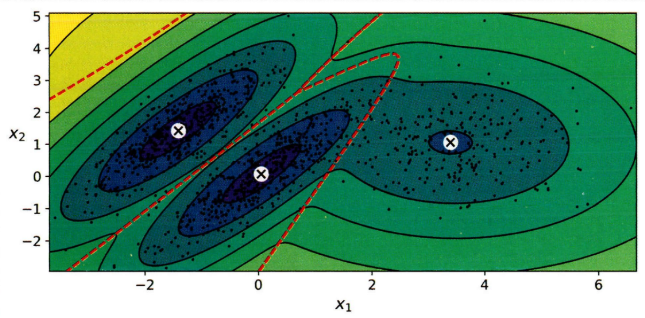

이 모델의 클러스터 평균, 결정 경계(파선), 밀도 등고선

- GMM 알고리즘은 클러스터의 개수가 정확히 주어지면 잘 작동하지만, 특성이나 클러스터가 많거나 샘플이 적을 때는 최적의 솔루션을 찾기 어려울 수 있음. 이를 해결하려면 알고리즘이 학습할 파라미터의 개수를 제한해야 함.

### 공분산 행렬에 제약을 추가하는 방법
사이킷런의 `Covariance_type` 매개변수에 다음 값을 설정할 수 있다:
- "spherical": 모든 클러스터가 원형 모양을 가짐. 지름은 다를 수 있음(즉, 분산이 다름).
- "diag": 클러스터는 타원형 모양을 가질 수 있지만, 타원의 축은 좌표 축과 나란해야 함(즉, 공분산 행렬이 대각 행렬).
- "tied": 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가짐(즉, 모든 클러스터는 동일한 공분산 행렬을 공유).
- "full" (기본값): 각 클러스터는 모양, 크기, 방향에 제약이 없음.

이 제약들을 사용하면 EM 알고리즘이 더 안정적으로 최적의 솔루션을 찾을 수 있음.


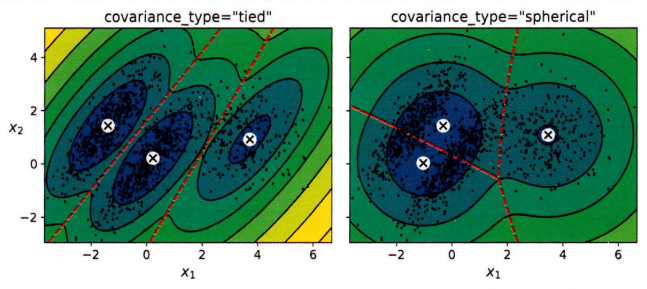

covariance_type
을 "tied" 또는 "spherical"로 지정했을 때 EM 알고리즘으로 찾은 솔루션

## 9.2.1 가우시안 혼합을 사용한 이상치 탐지

- **이상치 탐지** :  일반적인 샘플과 많이 다른 샘플을 감지하는 작업.  
- 이상치는 **outlier**라고 하고, 일반적인 샘플은 **inlier**라고 함. 이상치 탐지는 다양한 애플리케이션에서 사용된다:
 - 부정 거래 감지
 - 제조 결함 제품 감지
 - 데이터셋에서 이상치를 제거하여 모델 성능 향상

### GMM을 이용한 이상치 탐지
GMM을 이용해 **밀도가 낮은 지역**에 있는 샘플을 이상치로 간주할 수 있다.  
이상치 탐지를 위해서는 **밀도 임곗값**을 설정해야 한다.

### 예시: 결함 제품 탐지
- 결함 제품 비율이 4%라고 가정하면, 밀도 임곗값을 4%로 설정해 밀도가 낮은 지역의 샘플을 이상치로 분류한다.


In [14]:
import numpy as np

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

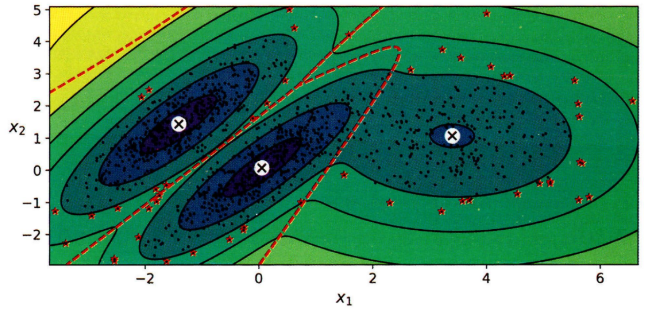

x 표시가 이상치

### 특이치 탐지 (Novelty Detection) vs 이상치 탐지

**특이치 탐지**는 이상치가 포함되지 않은 **깨끗한 데이터셋**에서 훈련하는 방식으로 이상치 탐지와 다르다.

반면 **이상치 탐지**는 이상치가 포함된 데이터셋에서 훈련할 수 있다.  
- 특이치 탐지는 데이터셋을 정제하는 데 자주 사용된다.

### GMM을 이용한 특이치 탐지
- GMM 알고리즘은 **클러스터의 개수**를 지정해야 한다.
- **클러스터 개수**를 어떻게 찾을 수 있을지에 대한 질문이 제기된다.

## 9.2.2 클러스터 개수 선택하기

**k-평균** 알고리즘은 **이너셔**나 **실루엣 점수**를 사용해 적절한 클러스터 개수를 선택하지만, GMM에서는 이런 지표들을 사용할 수 없다.  
이유는 클러스터가 **타원형**이거나 **크기가 다를 때** 이러한 지표들이 안정적이지 않기 때문이다.  

대신 GMM에서는 **BIC (Bayesian Information Criterion)** 또는 **AIC (Akaike Information Criterion)**와 같은 **이론적 정보 기준**을 최소화하는 모델을 찾는다.

공식:
- BIC = $\log(m) p - 2 \log(\hat{L})$
- AIC = $2p - 2 \log(\hat{L})$


- **m**: 샘플의 개수
- **p**: 모델이 학습할 파라미터의 개수
- **$\hat{L}$**: 모델의 최대 우도 함수 (likelihood function)


- 둘 다 **파라미터가 많은 모델**에 벌칙을 가하고, **데이터에 잘 맞는 모델**에 보상을 줌.
- 일반적으로 BIC와 AIC는 같은 모델을 선택하지만, **BIC**는 AIC보다 더 **간단한 모델**(적은 파라미터)을 선택하는 경향이 있음.
- **BIC**는 대규모 데이터셋에서 과적합을 방지할 수 있지만, 데이터에 잘 맞지 않을 수도 있음.

가능도 함수와 확률 함수는 다름:

확률: 주어진 파라미터로 미래 샘플 x의 가능성을 예측.

가능도: 주어진 샘플 x에 대해 파라미터 값의 적합도를 평가.

**확률 밀도 함수(PDF)**는 x의 함수, 가능도 함수는 파라미터의 함수입니다. 가능도 함수는 확률 분포와 달리 적분해도 1이 되지 않으며, 가능한 모든 파라미터에 대해 값이 다를 수 있음.

**최대 가능도 추정(MLE)**은 데이터에 가장 적합한 파라미터를 찾는 방법으로, 보통 로그 가능도를 최대화하여 계산합니다. 이 후 AIC와 BIC 계산을 위해 로그 가능도를 사용.

In [15]:
gm.bic(X)

np.float64(2785.348025055667)

In [16]:
gm.aic(X)

np.float64(2701.916185312971)

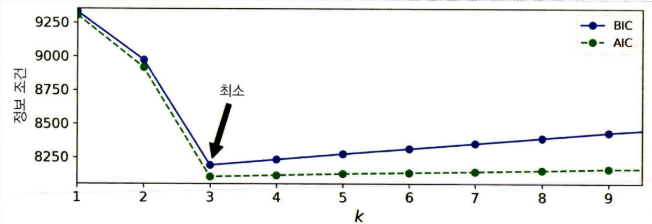

- k=3에서 BIC, AIC가 모두 가장 작음

## 9.2.3 베이즈 가우시안 혼합 모델

BayesianGaussianMixture : 클러스터 개수를 자동으로 최적화하여 불필요한 클러스터의 가중치를 0으로 만듦

In [17]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
np.round(bgm.weights_, 2)

/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.13, 0.14, 0.12, 0.12, 0.18, 0.12, 0.11, 0.09, 0.  , 0.  ])

- BayesianGaussianMixture는 클러스터 개수를 자동으로 추정하며, 클러스터 파라미터(가중치, 평균, 공분산 등)를 잠재 확률 변수로 취급.

- **베타 분포(Beta Distribution)** : 0에서 1 사이의 값을 모델링하는데 사용. 예를 들어, SBP(Stick-Breaking Process)는 클러스터 할당을 모델링하는 데 사용되며, 각 클러스터에 할당되는 샘플 비율을 결정.

- 농도 파라미터(Concentration Parameter, Q): Q가 크면 많은 클러스터가 생성되고, Q가 작으면 적은 클러스터가 생성.

- **위샤트 분포(Wishart Distribution)**는 공분산 행렬을 샘플링하는 데 사용되며, 이를 통해 클러스터의 분포 모양을 제어.

즉, 이 모델은 클러스터 개수를 자동으로 선택하고, 각 클러스터에 할당된 샘플 비율을 베타 분포를 통해 조절하며, 공분산 행렬을 위샤트 분포를 이용해 샘플링

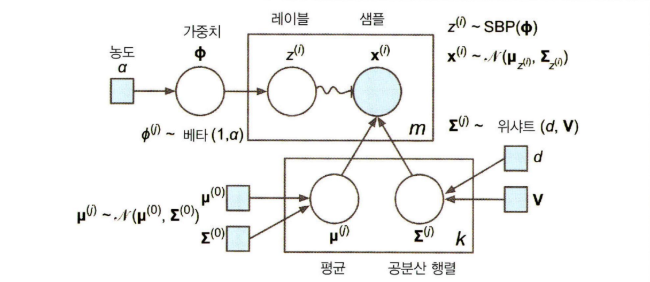

- 사전 확률(prior probability): 잠재 변수 \( z \)에 대한 사전 지식은 사전 확률 분포 \( p(z) \)에 인코딩됩니다.
-사전 믿음(prior belief): 클러스터 개수에 대한 믿음을 조정할 수 있으며, 이는 weight_concentration_prior 매개변수로 설정합니다. 낮은 농도(적은 클러스터)나 높은 농도(많은 클러스터)에 대한 믿음을 반영할 수 있습니다.
- 사전 믿음의 영향: 사전 믿음은 데이터가 적을 때 더 중요한 영향을 미치며, 데이터가 많아질수록 사전 믿음의 중요성은 감소합니다.
- 예시: weight_concentration_prior를 0.01 또는 10,000으로 설정하면 매우 다른 군집 결과를 생성할 수 있습니다.

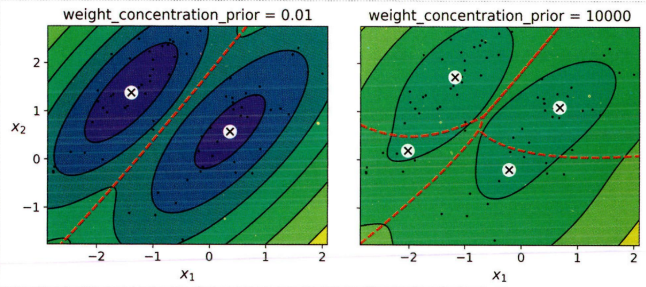

<베이즈정리>

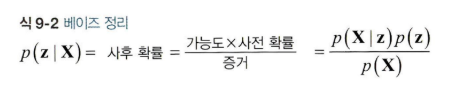

- **베이즈 정리**: 데이터 $ X $를 관측한 후 잠재 변수 $ z $의 사후 확률 $ p(z|X) $를 업데이트하는 과정  
- **계산 어려움**: $ p(X) $는 모든 $ z $에 대해 적분해야 하므로 계산하기 어려움  
- **해결 방법 - 변분 추론**:  
  - $ q(z; \lambda) $라는 근사 분포를 설정하고, 이를 최적화하여 $ p(z|X) $에 가깝게 만듦  
  - KL 발산 $ D_{KL}(q \parallel p) $을 최소화하는 대신, 증거 하한(ELBO)을 최대화하여 근사 해결  


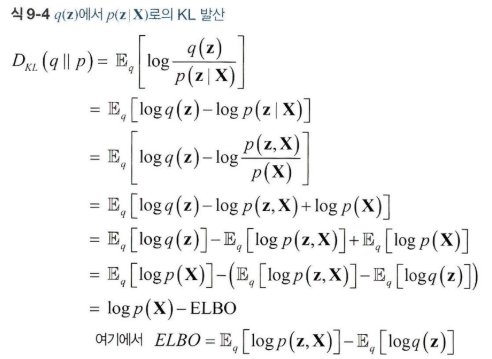

- ELBO 최대화 방법: 평균장 변분 추론(MFVI)은 분포와 사전 확률 선택이 중요함.

- BayesianGaussianMixture: 사이킷런에서 사용하며, EM 알고리즘과 유사하지만 더 느림.

- BBSVI(블랙 박스 확률적 변분 추론): 샘플링과 경사 상승법을 사용하여 ELBO를 최적화.

- 베이즈 딥러닝: 베이즈 추론을 심층 신경망에 적용하는 기법.

- 가우시안 혼합 모델(GMM): 타원형 클러스터에 적합하지만 복잡한 형태의 데이터에는 부적절함.

- 베이즈 GMM 실험: 반달형 데이터셋에서는 잘 작동하지 않을 가능성이 큼.

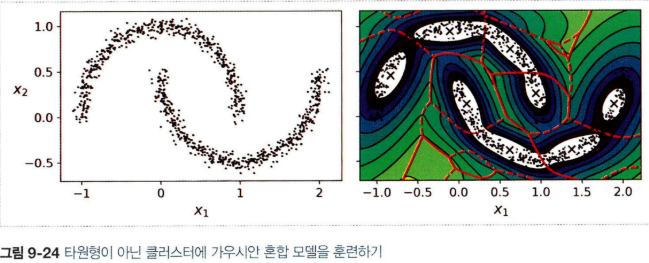

- 반달형 데이터에서 두 개의 클러스터를 제대로 식별하지 못하고 8개 클러스터를 찾음.

- 이상치 감지: 밀도 추정은 나쁘지 않지만, 두 개의 반달 모양을 식별하는 데 실패.

- 임의의 모양을 처리할 수 있는 다른 군집 알고리즘을 알아볼 예정.

## 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

- PCA: 재구성 오차를 비교하여 이상치 탐지. 재구성 오차가 큰 샘플을 이상치로 판별.

- Fast-MCD (Minimum Covariance Determinant): 가우시안 분포를 가정하고 이상치를 감지.

- 아이솔레이션 포레스트 (Isolation Forest): 무작위 결정 트리로 구성된 랜덤 포레스트를 사용해 이상치 탐지. 고차원 데이터셋에서 효율적.

- LOF (Local Outlier Factor): 샘플의 밀도와 이웃의 밀도를 비교하여 이상치를 탐지.

- One-Class SVM: 고차원 공간에서 이상치를 탐지하는 지원 벡터 머신. 마진을 통해 정상 샘플과 이상치를 구분. 고차원 데이터셋에서 잘 작동하지만 대규모 데이터셋에는 한계.